<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Artem/lenet/gamayunov2004_lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="paleBlueRows" style="height: 310px;" width="700">
<thead>
<tr>
<th>Layer</th>
<th>Layer type 2</th>
<th>Feature maps</th>
<th>Size</th>
<th>Kernel size</th>
<th>Stride</th>
<th>Activation</th>
</tr>
</thead>
<tbody>
<tr>
<td>input</td>
<td>image</td>
<td>1</td>
<td>28*28</td>
<td>-</td>
<td>-</td>
<td>-</td>
</tr>
<tr>
<td>1</td>
<td>convolution</td>
<td>6</td>
<td>28*28</td>
<td>5*5</td>
<td>1</td>
<td>tanh</td>
</tr>
<tr>
<td>2</td>
<td>average pooling</td>
<td>6</td>
<td>14*14</td>
<td><span style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; background-color: #d0e4f5;">2*2</span></td>
<td>2</td>
<td>tanh</td>
</tr>
<tr>
<td>3</td>
<td><span style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400;">convolution</span></td>
<td>16</td>
<td>10*10</td>
<td>5*5</td>
<td>1</td>
<td>tanh</td>
</tr>
<tr>
<td>4</td>
<td>average pooling</td>
<td>16</td>
<td>5*5</td>
<td><span style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; background-color: #d0e4f5;">2*2</span></td>
<td>2</td>
<td>tanh</td>
</tr>
<tr>
<td>5</td>
<td>fully connected</td>
<td>-</td>
<td>120</td>
<td>-</td>
<td>-</td>
<td>tanh</td>
</tr>
<tr>
<td>6</td>
<td><span style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; background-color: #d0e4f5;">fully connected</span></td>
<td>-</td>
<td>84</td>
<td>-</td>
<td>-</td>
<td><span style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; background-color: #d0e4f5;">tanh</span></td>
</tr>
<tr>
<td>output</td>
<td><span style="font-family: 'Times New Roman', Times, serif; font-size: 16px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400;">fully connected</span></td>
<td>-</td>
<td>35</td>
<td>-</td>
<td>-</td>
<td>-</td>
</tr>
</tbody>
</table>

**Train dataset:** MNIST + EMNIST letters

**Test dataset:** dataset of DreamTeam

**Training sample size:** 36960

**Testing sample size:** 16784

**Loss function:** Cross Entropy Loss

**Optimizer:** Adam

**Learning rate:** 1.0e-3

**Batch size:** 1120

**Epoch number:** 100

***IMPORT***

---

In [9]:
import torch
import torchvision.datasets
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm_notebook as bar

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

***REPO***

---



In [ ]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

***TORCH.DEVICE***

---



In [11]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

***DATASET***

---



In [31]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

***SHOW VAL_DATA***

---



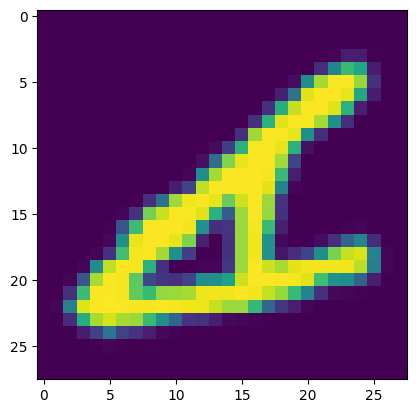

In [41]:
plt.imshow(val_data.cpu()[1][0])
plt.show()

***NEURAL NETWORK***

---



In [32]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()

        self.fc3   = torch.nn.Linear(84, 35)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5()

In [33]:
lenet5 = lenet5.to(device)

***LOSS- AND OPTIMIZER-FUNCTIONS***

---



In [34]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

***METRICS***

---



In [35]:
train_accuracy_history = []
val_accuracy_history = []
test_accuracy_history = []
train_loss_history = []
val_loss_history = []
test_loss_history = []

***LEARNING***

---



In [36]:
batch_size = 1120

for epoch in bar(range(100), desc='LEARNING'):
  order = np.random.permutation(len(train_data))
  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes].to(device)
    label_batch = train_labels[batch_indexes].to(device)

    preds = lenet5.forward(data_batch)

    loss_val = loss(preds, label_batch)
    loss_val.backward()

    optimizer.step()


  train_preds = lenet5.forward(train_data)
  val_preds = lenet5.forward(val_data)
  test_preds = lenet5.forward(test_data)

  train_loss_history.append(loss(train_preds, train_labels).data.cpu())
  val_loss_history.append(loss(val_preds, val_labels).data.cpu())
  test_loss_history.append(loss(test_preds, test_labels).data.cpu())

  train_accuracy = (train_preds.argmax(dim=1)==train_labels).float().mean().data.cpu()
  val_accuracy = (val_preds.argmax(dim=1)==val_labels).float().mean().data.cpu()
  test_accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()

  train_accuracy_history.append(train_accuracy)
  val_accuracy_history.append(val_accuracy)
  test_accuracy_history.append(test_accuracy)

print("The net has been trained")

<ipython-input-36-b5c0482788ed>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc='LEARNING'):


LEARNING:   0%|          | 0/100 [00:00<?, ?it/s]

The net has been trained


***ACCURACY HISTORY***

---



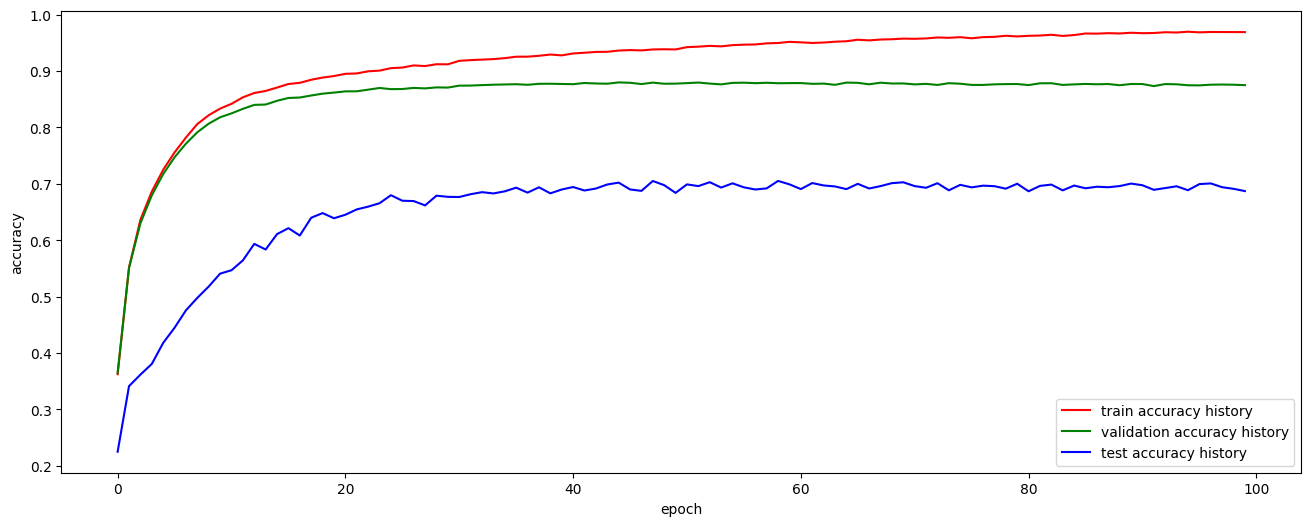

In [37]:
plt.figure(figsize=(16.0, 6.0))
plt.plot(range(len(train_accuracy_history)), train_accuracy_history, c = 'red', label = 'train accuracy history')
plt.plot(range(len(train_accuracy_history)), val_accuracy_history, c = 'green', label = 'validation accuracy history')
plt.plot(range(len(train_accuracy_history)), test_accuracy_history, c = 'blue', label = 'test accuracy history')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

***LOSS HISTORY***

---



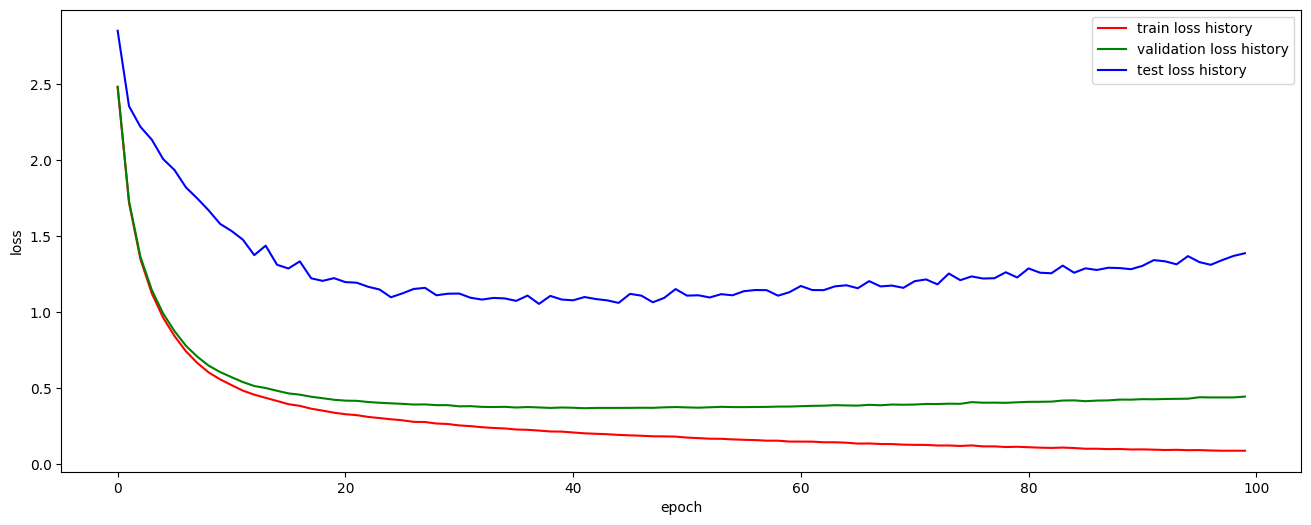

In [38]:
plt.figure(figsize=(16.0, 6.0))
plt.plot(range(len(train_loss_history)), train_loss_history, c = 'red', label = 'train loss history')
plt.plot(range(len(train_loss_history)), val_loss_history, c = 'green', label = 'validation loss history')
plt.plot(range(len(train_loss_history)), test_loss_history, c = 'blue', label = 'test loss history')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')